<a href="https://colab.research.google.com/github/nayrr25/An-lisis-de-inconsistencias-en-licitaci-n-p-blica/blob/main/Inconsistencias%20en%20base%20unida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><font color="#004D7F" size=6> Análisis de datos</font></h2>



<h1><font color="#004D7F" size=5>1. Cargar el conjunto de datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Nancy Raquel Rodríguez Ramos</font><br>
<font color="#004D7F" size=3>Propuesta para exploración inicial de datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
* [2. Cargar CSV](#section2)
    * [2.1. Desde Pandas](#section2)
* [3. Descripción del conjunto de datos](#section3)
* [4. Distribución entre clases: _groupby('class').size()_](#section4)
* [5.Correlaciones](#section5)
* [6.Asimetría](#section6)
* [7. Visualización Univariable](#section7)
    * [7.1. Histogramas](#section71)
    * [7.3. Boxplot](#section73)
    * [7.4. Valores únicos en cada variable del dataframe](#section74)
* [8.Valores nulos](#section8)
* [9.Dispersión por clase](#section9)
* [10.Informe HTML de la base](#section10)

In [ ]:
import os

# Load libraries
import os
%matplotlib inline
from itertools import cycle, islice
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from pandas import read_csv
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import norm
from sklearn import cluster, datasets
from sklearn import datasets, metrics, model_selection, svm
from sklearn import preprocessing
from sklearn.base import BaseEstimator, clone
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # for Support Vector Classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.validation import check_is_fitted
import matplotlib.pyplot as plt
import missingno as msno
import multiprocessing
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import scipy.cluster.hierarchy as sch
import scipy.stats
import seaborn as sns
import time
import warnings
pd.set_option('display.max_columns', 60)
warnings.filterwarnings('ignore')

In [ ]:
# Especifica la ruta del directorio

# Especifica la ruta del directorio
dir = "C:\\Users\\114310416\\Documents\\Data Challenge\\data"
dir2= "C:\\Users\\114310416\\Documents\\Data Challenge\\Resultados Finales"

# Funciones

In [ ]:
def encuentra_archivo(directorio, palabra):
    """
    Encuentra archivos en un directorio que contienen una palabra en el nombre.

    Parámetros:
    - directorio (str): Ruta del directorio donde buscar archivos.
    - palabra (str): Palabra a buscar en el nombre de los archivos.

    Retorna:
    - archivos_con_palabra (list): Lista de nombres de archivos que contienen la palabra.
    """

    # Lista todos los archivos en el directorio
    archivos = os.listdir(directorio)

    # Filtra solo los archivos (no directorios) si es necesario
    archivos = [archivo for archivo in archivos if os.path.isfile(os.path.join(directorio, archivo))]

    # Filtra los archivos que contienen la palabra en el nombre
    archivos_con_palabra = [archivo for archivo in archivos if palabra in archivo]

    # Imprime la lista de archivos que contienen la palabra
    for archivo in archivos_con_palabra:
        print(archivo)

    return archivos_con_palabra


# Apertura de Archivos

In [ ]:
directorio = dir2
palabra_a_buscar = "uni2"
archivos_encontrados = encuentra_archivo(directorio, palabra_a_buscar)

# Selecciona un archivo específico de la lista
nombre_archivo_seleccionado = archivos_encontrados[0]  # Cambia el índice según tus necesidades

# Lee el archivo Excel
df = pd.read_csv(os.path.join(directorio, nombre_archivo_seleccionado), sep=",", header=0)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\114310416\\Documents\\Data Challenge\\Resultados Finales'

In [ ]:
import pandas as pd
#df=pd.read_csv("iris.data.csv", sep=",", header=0)

Muchos conjuntos de datos ya vienen ya por defecto en Python a través de la librería [scikit-learn](https://scikit-learn.org/stable/datasets/index.html), lo que significa que no necesita cargar el paquete explícitamente. Estos conjunto de datos se encuentran dentro del módulo `datasets` y de ahí podrán cargarse de manera muy sencillo cargarlo

<a id="section3"></a>
# <font color="#004D7F"> 3. Descripción de conjuntos de datos</font>

In [ ]:
df.shape

(26501, 108)

Para visualizar cuales columnas tiene el archivo

In [ ]:
df.columns.to_list()

['Unnamed: 0',
 'Clave_iniciado_pk',
 'nro_sicop_x',
 'nro_linea',
 'numero_partida',
 'subpartida_og',
 'cedula_institucion_x',
 'nombre_institucion_x',
 'nro_procedimiento_x',
 'fecha_publicacion_x',
 'fecha_invitacion',
 'ano_publicacion_x',
 'ano_invitacion',
 'tipo_procedimiento_x',
 'modalidad_procedimiento_x',
 'excepcion_cd_x',
 'objeto_contractual_x',
 'cantidad_solicitada',
 'precio_unitario_estimado',
 'tipo_moneda_x',
 'tipo_cambio_crc_x',
 'tipo_cambio_dolar_x',
 'monto_estimado_linea',
 'Cod_Nivel1_x',
 'Nivel1_producto_x',
 'Cod_Nivel2_x',
 'Nivel2_producto_x',
 'Cod_Nivel3_x',
 'Nivel3_producto_x',
 'Cod_Nivel4_x',
 'Nivel4_producto_x',
 'Cod1_detalle_x',
 'detalle1_producto_x',
 'Clave_ofertada_PK',
 'nro_oferta',
 'cedula_institucion_y',
 'nombre_institucion_y',
 'cedula_proveedor_x',
 'nombre_proveedor_x',
 'tipo_proveedor_x',
 'tamano_proveedor_x',
 'nro_procedimiento_y',
 'fecha_publicacion_y',
 'ano_publicacion_y',
 'fecha_presenta_oferta',
 'ano_oferta',
 'tipo_p

Cambios de nombres que se escribe el nombreactual:nombreacambiar

Ahora bien, estos conjuntos de datos nos interesa poder convertirlos a un Dataframe de Pandas para poder trabajar con ellos de manera correcta.

Los siguientes comandos nos muestran las 5 primeros filas y las 5 últimas filas.

In [ ]:
df.head(5)

,Unnamed: 0,Clave_iniciado_pk,nro_sicop_x,nro_linea,numero_partida,subpartida_og,cedula_institucion_x,nombre_institucion_x,nro_procedimiento_x,fecha_publicacion_x,fecha_invitacion,ano_publicacion_x,ano_invitacion,tipo_procedimiento_x,modalidad_procedimiento_x,excepcion_cd_x,objeto_contractual_x,cantidad_solicitada,precio_unitario_estimado,tipo_moneda_x,tipo_cambio_crc_x,tipo_cambio_dolar_x,monto_estimado_linea,Cod_Nivel1_x,Nivel1_producto_x,Cod_Nivel2_x,Nivel2_producto_x,Cod_Nivel3_x,Nivel3_producto_x,Cod_Nivel4_x,...,tamano_proveedor_y,nro_procedimiento,fecha_publicacion,ano_publicacion,fecha_adj_firme,ano_adjudicacion,tipo_procedimiento,modalidad_procedimiento,excepcion_cd,objeto_contractual,cantidad_adjudicada,precio_unitario_adjudicado,tipo_moneda,tipo_cambio_crc,tipo_cambio_dolar,monto_adjudicado_linea,Cod_Nivel1,Nivel1_producto,Cod_Nivel2,Nivel2_producto,Cod_Nivel3,Nivel3_producto,Cod_Nivel4,Nivel4_producto,Cod1_detalle,detalle1_producto,Cod2_detalle_y,detalle2_producto_y,Clave_adj_FK_proc,Clave_adj_FK_ofe
0,0,2024021380924218200392331240,20240213809,2,1,2.04.02,4000042147,CAJA COSTARRICENSE DE SEGURO SOCIAL,2024PX-000001-0001102702,2024-02-01 10:06:40,2024-02-01 10:06:40,2024,2024,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Proveedor único (Inciso c del artículo 3 LGCP ...,Compra de repuesto para Colposcopio del Hospit...,1.0,270.00,USD,520.78,1.00,140610.60,42.0,"Equipo, Accesorios y Suministros Médicos",4218.0,Exámenes de pacientes y productos de monitoreo,421820.0,"Especulo, scopios y accesorios para uso del re...",42182003.0,...,Mediana,2024PX-000001-0001102702,2024-02-01 10:06:40,2024.0,2024-03-06 07:39:58,2024.0,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Proveedor único (Inciso c del artículo 3 LGCP ...,Compra de repuesto para Colposcopio del Hospit...,1.0,270.00,USD,515.07,1.0,139068.90,42.0,"Equipo, Accesorios y Suministros Médicos",4218.0,Exámenes de pacientes y productos de monitoreo,421820.0,"Especulo, scopios y accesorios para uso del re...",42182003.0,Colposcopios o vaginoscopios,4.218200e+15,REPUESTOS PARA COLPOSCOPIO.,421820039233124000000001,REPUESTOS PARA COLPOSCOPIO.,2024021380924218200392331240,20240213809D202402071652504455170734637053502
1,1,2023100194648111219992302517,20231001946,4,4,5.01.07,4000042149,UNIVERSIDAD DE COSTA RICA,2023PX-000032-0000900001,2023-10-13 18:04:11,2023-10-13 18:04:11,2023,2023,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Proveedor único (Inciso c del artículo 3 LGCP ...,SUSCRIPCIÓN A RECURSOS DE INFORMACIÓN Dot Lib ...,1.0,3134320.00,CRC,534.52,534.52,3134320.00,81.0,"Servicios basados en ingeniería, investigación...",8111.0,"Servicios informáticos,de computación, audio y...",811121.0,Servicios de Internet,81112199.0,...,Mediana,2023PX-000032-0000900001,2023-10-13 18:04:11,2023.0,2023-10-28 13:25:40,2023.0,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Proveedor único (Inciso c del artículo 3 LGCP ...,SUSCRIPCIÓN A RECURSOS DE INFORMACIÓN Dot Lib ...,1.0,7110.00,USD,535.84,1.0,3809822.40,81.0,"Servicios basados en ingeniería, investigación...",8111.0,"Servicios informáticos,de computación, audio y...",811121.0,Servicios de Internet,81112199.0,Servicios de indexación de datos y contenidos ...,8.111220e+15,"RECURSO ELECTRÓNICO ARTSTOR LIBRARY-ARTSTOR, T...",811121999230251700000001,Recurso Electrónico Artstor Library-ARTSTOR\r\...,2023100194648111219992302517,20231001946D202310160830473251169746664724304
2,2,2023080350218111190292374970,20230803502,1,1,1.03.07,4000001902,INSTITUTO NACIONAL DE SEGUROS,2023PX-000141-0001000001,2023-08-30 12:57:56,2023-08-30 12:57:56,2023,2023,PROCEDIMIENTO POR EXCEPCIÓN,Servicios,Proveedor único (Inciso c del artículo 3 LGCP ...,Membresía Base de datos Ilibrary OCDE,1.0,4331598.00,CRC,541.94,541.94,4331598.00,81.0,"Servicios basados en ingeniería, investigación...",8111.0,"Servicios informáticos,de computación, audio y...",811119.0,Sistemas de recuperación de la información,81111902.0,...,Grande,2023PX-000141-0001000001,2023-08-30 12:57:5

si por alguna razón nos sirve más ver los últimos 5

In [ ]:
df.tail(5)

,Unnamed: 0,Clave_iniciado_pk,nro_sicop_x,nro_linea,numero_partida,subpartida_og,cedula_institucion_x,nombre_institucion_x,nro_procedimiento_x,fecha_publicacion_x,fecha_invitacion,ano_publicacion_x,ano_invitacion,tipo_procedimiento_x,modalidad_procedimiento_x,excepcion_cd_x,objeto_contractual_x,cantidad_solicitada,precio_unitario_estimado,tipo_moneda_x,tipo_cambio_crc_x,tipo_cambio_dolar_x,monto_estimado_linea,Cod_Nivel1_x,Nivel1_producto_x,Cod_Nivel2_x,Nivel2_producto_x,Cod_Nivel3_x,Nivel3_producto_x,Cod_Nivel4_x,...,tamano_proveedor_y,nro_procedimiento,fecha_publicacion,ano_publicacion,fecha_adj_firme,ano_adjudicacion,tipo_procedimiento,modalidad_procedimiento,excepcion_cd,objeto_contractual,cantidad_adjudicada,precio_unitario_adjudicado,tipo_moneda,tipo_cambio_crc,tipo_cambio_dolar,monto_adjudicado_linea,Cod_Nivel1,Nivel1_producto,Cod_Nivel2,Nivel2_producto,Cod_Nivel3,Nivel3_producto,Cod_Nivel4,Nivel4_producto,Cod1_detalle,detalle1_producto,Cod2_detalle_y,detalle2_producto_y,Clave_adj_FK_proc,Clave_adj_FK_ofe
26496,26496,2023111017218610189892040567,20231110172,1,1,1.07.01,4000042152,BANCO POPULAR Y DE DESARROLLO COMUNAL,2023PX-000204-0020600001,2023-11-27 15:01:31,2023-11-27 15:01:31,2023,2023,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Capacitación abierta (Inciso e del artículo 3 ...,Inscripción relacionada al curso Taller Desarr...,2.0,150000.0,CRC,533.88,533.88,300000.0,86.0,Servicios Educativos y de Formación,8610.0,Formación profesional,861018.0,Servicio de entrenamiento y desarrollo de recu...,86101898.0,...,NaN,2023PX-000204-0020600001,2023-11-27 15:01:31,2023.0,2023-11-29 14:27:05,2023.0,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Capacitación abierta (Inciso e del artículo 3 ...,Inscripción relacionada al curso Taller Desarr...,2.0,147000.0,CRC,533.34,533.34,294000.0,86.0,Servicios Educativos y de Formación,8610.0,Formación profesional,861018.0,Servicio de entrenamiento y desarrollo de recu...,86101898.0,Capacitación en ciencias sociales,8.610190e+15,"SERVICIO DE CAPACITACION EN DIVERSOS TEMAS, IN...",861018989204056700000001,"SERVICIO DE CAPACITACION EN DIVERSOS TEMAS, IN...",2023111017218610189892040567,20231110172D202311280951361058170118669690501
26497,26497,2023100147137315999792013594,20231001471,3,1,1.01.02,3007111111,COMISION NACIONAL DE PREVENCION DE RIESGOS Y A...,2023PX-000215-0006500001,2023-10-10 10:00:36,2023-10-10 10:00:36,2023,2023,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Contratación por emergencia Ley 8488,CEL: Alquiler de maquinaria pesada para atende...,100.0,1.0,CRC,540.06,540.06,100.0,73.0,Servicios de manufactura y producción industrial,7315.0,Servicios de apoyo a la fabricación,731599.0,Servicios de alquiler de equipo,73159997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26498,26498,2023100147137315999792013594,20231001471,3,1,1.01.02,3007111111,COMISION NACIONAL DE PREVENCION DE RIESGOS Y A...,2023PX-000215-0006500001,2023-10-10 10:00:36,2023-10-10 10:00:36,2023,2023,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Contratación por emergencia Ley 8488,CEL: Alquiler de maquinaria pesada para atende...,100.0,1.0,CRC,540.06,540.06,100.0,73.0,Servicios de manufactura y producción industrial,7315.0,Servicios de apoyo a la fabricación,731599.0,Servicios de alquiler de equipo,73159997.0,...,Mediana,2023PX-000215-0006500001,2023-10-10 10:00:36,2023.0,2023-10-19 10:55:30,2023.0,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Contratación por emergencia Ley 8488,CEL: Alquiler de maquinaria pesada para atende...,100.0,22000.0,CRC,536.28,536.28,2200000.0,73.0,Servicios de manufactura y producción industrial,7315.0,Servicios de apoyo a la fabricación,731599.0,Servicios de alquiler de equipo,73159997.0,"Alquiler de equipo industrial (NO USAR, USAR L...",7.316000e+15,ALQUILER DE VAGONETA,731599979201359400000009,ALQUILER DE VAGONETA DE VOLTEO\n2017CD-000269-...,2023100147137315999792013594,20231001471D202310101638254504

Ahora bien, estos conjuntos de datos nos interesa poder convertirlos a un Dataframe de Pandas para poder trabajar con ellos de manera correcta.

Con el siguiente comando podemos ver los tipos de datos registrados en cada variable, se debe tomar en cuenta para toma de decisiones de transformaciones o cambio de tipo de variable requerido en próximos análisis

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
   print(df.dtypes)

Unnamed: 0                      int64
Clave_iniciado_pk              object
nro_sicop_x                     int64
nro_linea                       int64
numero_partida                  int64
subpartida_og                  object
cedula_institucion_x            int64
nombre_institucion_x           object
nro_procedimiento_x            object
fecha_publicacion_x            object
fecha_invitacion               object
ano_publicacion_x               int64
ano_invitacion                  int64
tipo_procedimiento_x           object
modalidad_procedimiento_x      object
excepcion_cd_x                 object
objeto_contractual_x           object
cantidad_solicitada           float64
precio_unitario_estimado      float64
tipo_moneda_x                  object
tipo_cambio_crc_x             float64
tipo_cambio_dolar_x           float64
monto_estimado_linea          float64
Cod_Nivel1_x                  float64
Nivel1_producto_x              object
Cod_Nivel2_x                  float64
Nivel2_produ

Verificación del cambio de tipo de variable

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes.head(15))

Unnamed: 0                    int64
Clave_iniciado_pk            object
nro_sicop_x                   int64
nro_linea                     int64
numero_partida                int64
subpartida_og                object
cedula_institucion_x          int64
nombre_institucion_x         object
nro_procedimiento_x          object
fecha_publicacion_x          object
fecha_invitacion             object
ano_publicacion_x             int64
ano_invitacion                int64
tipo_procedimiento_x         object
modalidad_procedimiento_x    object
dtype: object


Cuando queremos un descriptivo estadístico de las variables numéricas, se puede obtener de la siguiente manera

In [ ]:
df.describe()

,Unnamed: 0,nro_sicop_x,nro_linea,numero_partida,cedula_institucion_x,ano_publicacion_x,ano_invitacion,cantidad_solicitada,precio_unitario_estimado,tipo_cambio_crc_x,tipo_cambio_dolar_x,monto_estimado_linea,Cod_Nivel1_x,Cod_Nivel2_x,Cod_Nivel3_x,Cod_Nivel4_x,Cod1_detalle_x,cedula_institucion_y,cedula_proveedor_x,ano_publicacion_y,ano_oferta,cantidad_ofertada,precio_unitario_ofertado,tipo_cambio_crc_y,tipo_cambio_dolar_y,monto_ofertado_linea,Cod_Nivel1_y,Cod_Nivel2_y,Cod_Nivel3_y,Cod_Nivel4_y,Cod1_detalle_y,nro_sicop_y,nro_acto,cedula_institucion,cedula_proveedor_y,ano_publicacion,ano_adjudicacion,cantidad_adjudicada,precio_unitario_adjudicado,tipo_cambio_crc,tipo_cambio_dolar,monto_adjudicado_linea,Cod_Nivel1,Cod_Nivel2,Cod_Nivel3,Cod_Nivel4,Cod1_detalle
count,26501.000000,2.650100e+04,26501.000000,26501.000000,2.650100e+04,26501.000000,26501.000000,2.650100e+04,2.650100e+04,26501.000000,26501.000000,2.650100e+04,26500.000000,26500.000000,26500.000000,2.650100e+04,2.650100e+04,2.368900e+04,2.368900e+04,23689.000000,23689.000000,2.368900e+04,2.366100e+04,23689.000000,23674.000000,2.366100e+04,23688.000000,23688.000000,23688.000000,2.368900e+04,2.368900e+04,1.880200e+04,1.880200e+04,1.880200e+04,1.880200e+04,18802.000000,18801.000000,1.880200e+04,1.880200e+04,18801.000000,18801.000000,1.880200e+04,18801.000000,18801.000000,18801.000000,1.880200e+04,1.880200e+04
mean,13250.000000,2.023404e+10,10.028263,2.955662,3.280208e+09,2023.340666,2023.340666,1.114513e+03,1.643177e+07,534.761844,484.318791,1.223215e+10,73.290113,7342.778792,734299.856453,7.342875e+07,7.342875e+15,3.277796e+09,3.338735e+09,2023.339736,2023.344084,1.212231e+03,1.455729e+07,534.741768,400.974279,3.333373e+07,73.399780,7353.743541,735396.751182,7.353828e+07,7.353828e+15,2.023365e+10,9.254706e+05,3.290505e+09,3.364966e+09,2023.300872,2023.324398,1.202994e+03,2.623033e+09,534.077728,390.740533,2.629375e+09,74.770544,7490.887719,749107.357534,7.490890e+07,7.490890e+15
std,7650.324078,4.702350e+06,23.847360,8.358814,5.201174e+08,0.485039,0.485039,7.635079e+04,4.238034e+08,16.401939,156.853401,1.403753e+12,17.166213,1715.439210,171542.941904,1.715519e+07,1.715519e+15,5.195772e+08,4.400164e+09,0.483422,0.484493,8.070636e+04,3.366024e+08,15.613341,231.886543,1.339635e+09,16.978116,1696.562569,169655.322442,1.696656e+07,1.696656e+15,4.540039e+06,5.721595e+04,5.382823e+08,4.765264e+09,0.469537,0.475154,8.751476e+04,3.588657e+11,14.758078,236.640206,3.588657e+11,16.297846,1628.466435,162845.628851,1.628610e+07,1.628610e+15
min,0.000000,2.022120e+10,1.000000,1.000000,2.100042e+09,2022.000000,2022.000000,0.000000e+00,0.000000e+00,502.860000,1.000000,0.000000e+00,10.000000,1012.000000,101215.000000,1.012160e+07,1.012160e+15,2.100042e+09,1.036410e+08,2022.000000,2022.000000,0.000000e+00,0.000000e+00,502.860000,0.912242,0.000000e+00,10.000000,1012.000000,101215.000000,1.012160e+07,1.012160e+15,2.022120e+10,8.202180e+05,2.100042e+09,1.036410e+08,2022.000000,2022.000000,5.000000e-01,1.000000e-06,502.860000,0.912242,0.000000e+00,10.000000,1012.000000,101215.000000,1.012160e+07,1.012160e+15
25%,6625.000000,2.023070e+10,1.000000,1.000000,3.007111e+09,2023.000000,2023.000000,1.000000e+00,2.839750e+03,524.850000,517.480000,5.468400e+04,73.000000,7315.000000,731599.000000,7.316000e+07,7.316000e+15,3.007111e+09,3.101009e+09,2023.000000,2023.000000,1.000000e+00,4.856000e+03,524.730000,1.000000,1.554640e+05,73.000000,7315.000000,731599.000000,7.316000e+07,7.316000e+15,2.023060e+10,8.760130e+05,3.014042e+09,3.101006e+09,2023.000000,2023.000000,1.000000e+00,4.050000e+03,525.050000,1.000000,1.402400e+05,78.000000,7818.000000,781801.000000,7.818011e+07,7.818011e+15
50%,13250.000000,2.023100e+10,2.000000,1.000000,3.014042e+09,2023.000000,2023.000000,1.000000e+00,1.142400e+05,536.550000,535.400000,3.500000e+05,78.000000,7818.000000,781815.000000,7.818151e+07,7.818151e+15,3.014042e+09,3.101236e+09,2023.000000,2023.000000,1.000000e+00,8.900000e+04,536.380000,532.000000,5.840000e+05,78.000000,781

<a id="section4"></a>
## <font color="#004D7F">4. Distribución entre clases: _groupby('class').size()_ </font>

Puede ver que hay casi el doble de observaciones con la clase 0 (sin aparición de diabetes) que con la clase 1 (aparición de diabetes). En este caso podemos observar que las clases se encuentran desbalanceadas por lo que los tenemos que analizar muy los resultados de los algoritmos.

In [ ]:
df.columns.to_list()

['Unnamed: 0',
 'Clave_iniciado_pk',
 'nro_sicop_x',
 'nro_linea',
 'numero_partida',
 'subpartida_og',
 'cedula_institucion_x',
 'nombre_institucion_x',
 'nro_procedimiento_x',
 'fecha_publicacion_x',
 'fecha_invitacion',
 'ano_publicacion_x',
 'ano_invitacion',
 'tipo_procedimiento_x',
 'modalidad_procedimiento_x',
 'excepcion_cd_x',
 'objeto_contractual_x',
 'cantidad_solicitada',
 'precio_unitario_estimado',
 'tipo_moneda_x',
 'tipo_cambio_crc_x',
 'tipo_cambio_dolar_x',
 'monto_estimado_linea',
 'Cod_Nivel1_x',
 'Nivel1_producto_x',
 'Cod_Nivel2_x',
 'Nivel2_producto_x',
 'Cod_Nivel3_x',
 'Nivel3_producto_x',
 'Cod_Nivel4_x',
 'Nivel4_producto_x',
 'Cod1_detalle_x',
 'detalle1_producto_x',
 'Clave_ofertada_PK',
 'nro_oferta',
 'cedula_institucion_y',
 'nombre_institucion_y',
 'cedula_proveedor_x',
 'nombre_proveedor_x',
 'tipo_proveedor_x',
 'tamano_proveedor_x',
 'nro_procedimiento_y',
 'fecha_publicacion_y',
 'ano_publicacion_y',
 'fecha_presenta_oferta',
 'ano_oferta',
 'tipo_p

In [ ]:
df['cedula_institucion_x'].value_counts()

cedula_institucion_x
3007111111    3857
4000042147    2756
3014042058    2098
3014056076    1172
4000042139     849
              ... 
3007075782       1
3007655746       1
3014042121       1
3112742370       1
3008056713       1
Name: count, Length: 244, dtype: int64

In [ ]:
df["tipo_procedimiento"].value_counts()

tipo_procedimiento
PROCEDIMIENTO POR EXCEPCIÓN    18802
Name: count, dtype: int64

In [ ]:
df['ano_publicacion'].value_counts()

ano_publicacion
2023.0    12955
2024.0     5752
2022.0       95
Name: count, dtype: int64

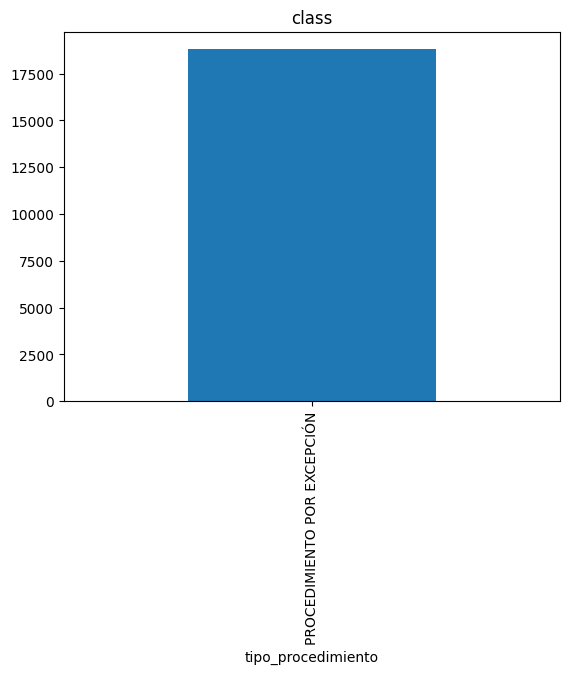

In [ ]:
import matplotlib.pyplot as plt
# Gráfico de barras de donaciones por edad
pd.value_counts(df["tipo_procedimiento"]).plot(kind='bar', title='class')
plt.show(abs)

<a id="section5"></a>
## <font color="#004D7F"> 5. Correlaciones: _corr()_ </font>

Puede usar la función corr() para calcular una matriz de correlación. La matriz enumera todos los atributos en la parte superior y lateral, para dar correlación entre todos los pares de atributos (dos veces, porque la matriz es simétrica). Puede ver que la línea diagonal a través de la matriz desde las esquinas superior izquierda a inferior derecha de la matriz muestra una correlación perfecta de cada atributo consigo mismo.

In [ ]:
import numpy as np
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int',"uint8","int32"]).corr(method='spearman')
tidy=tidy_corr_matrix(corr_matrix)

In [ ]:
tidy.head(25)

,variable_1,variable_2,r,abs_r
287,ano_invitacion,ano_publicacion_x,1.0,1.0
928,ano_publicacion_y,ano_publicacion,1.0,1.0
2034,Cod_Nivel2,Cod_Nivel2_x,1.0,1.0
1234,Cod_Nivel1_y,Cod_Nivel1_x,1.0,1.0
241,ano_publicacion_x,ano_invitacion,1.0,1.0
254,ano_publicacion_x,ano_publicacion_y,1.0,1.0
270,ano_publicacion_x,ano_publicacion,1.0,1.0
2048,Cod_Nivel2,Cod_Nivel2_y,1.0,1.0
1664,ano_publicacion,ano_publicacion_y,1.0,1.0
221,cedula_institucion_x,cedula_institucion,1.0,1.0


Si se quiere extraer el cuadro de correlaciones porque es muy grande, se puede exportar a excel para ver con mayor claridad

In [ ]:
#tidy.to_excel("corr.xlsx")

Con la siguiente matriz de correlación se puede ver un mapa de calor según el nivel de correlación, que obtuvimos en la estimación anterior

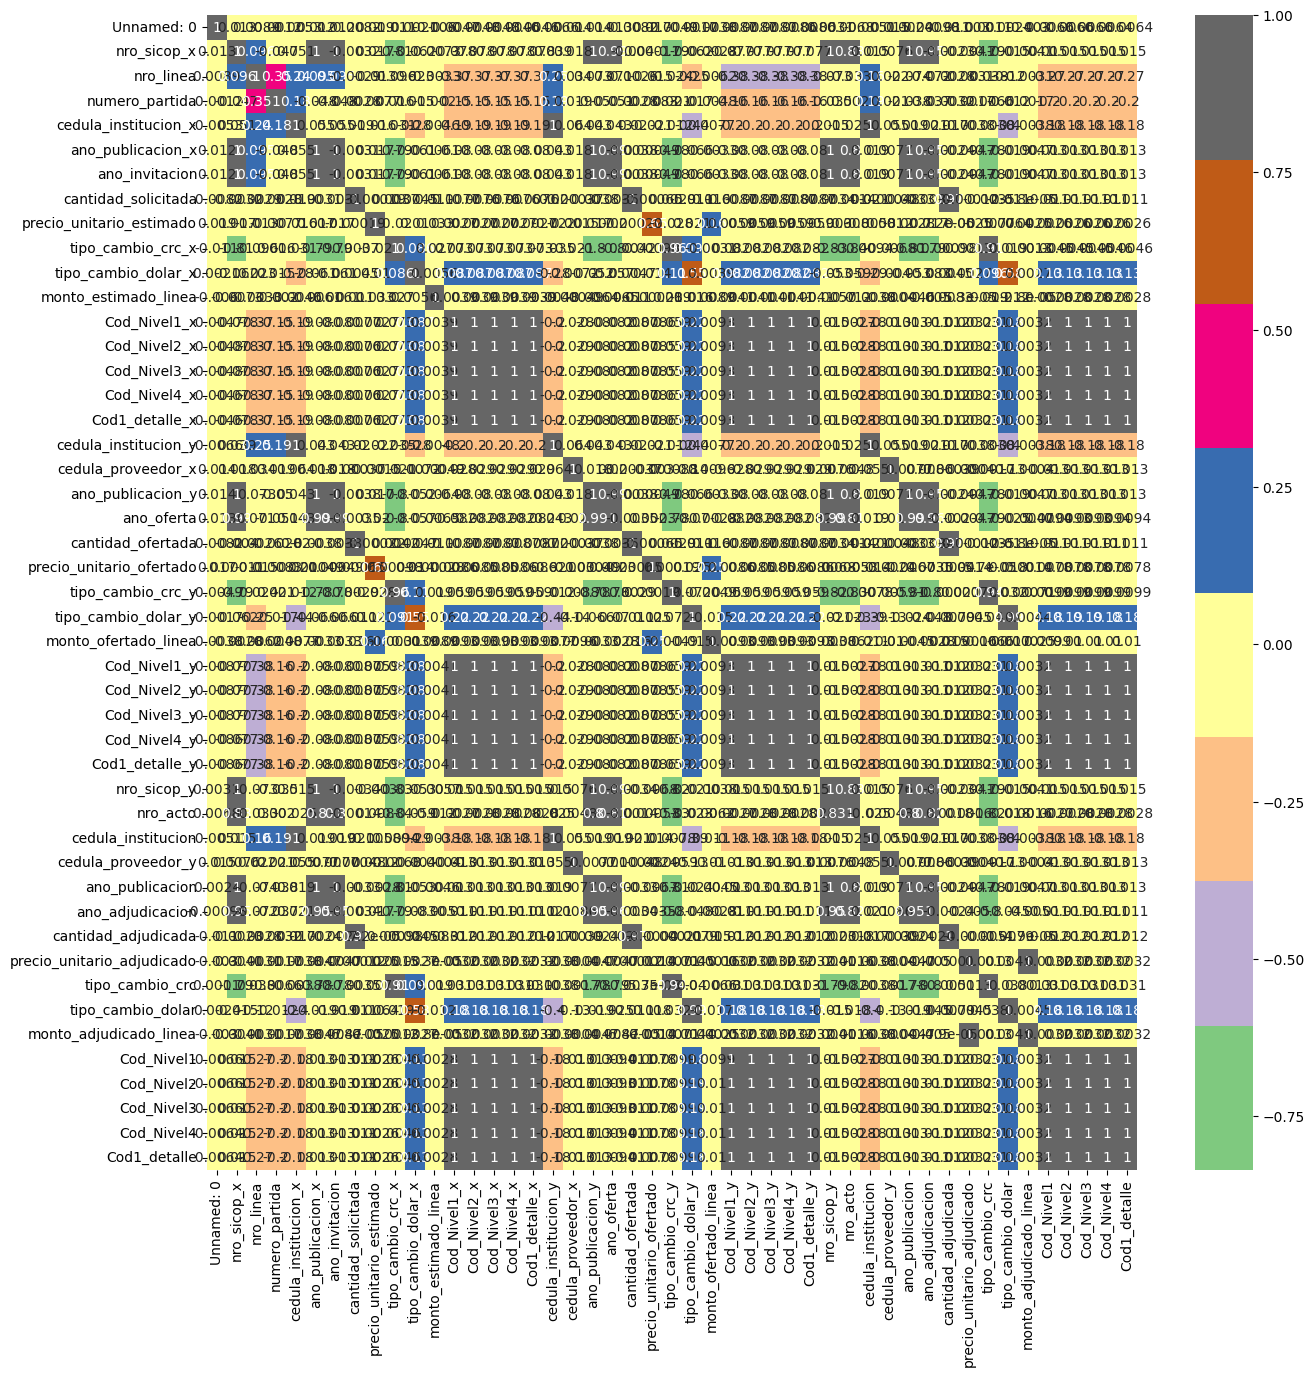

In [ ]:
import seaborn as sns
#Matriz de correlación de variables continuas.
top_corr_features=corr_matrix.index
plt.figure(figsize=(15,15))
fig=sns.heatmap(df[top_corr_features].corr(),annot=True,
                cmap="Accent")

In [ ]:

continuos= df.select_dtypes(include=['float64', 'int',"uint8","int32"])
continuos.columns

Index(['Unnamed: 0', 'nro_sicop_x', 'nro_linea', 'numero_partida',
       'cedula_institucion_x', 'ano_publicacion_x', 'ano_invitacion',
       'cantidad_solicitada', 'precio_unitario_estimado', 'tipo_cambio_crc_x',
       'tipo_cambio_dolar_x', 'monto_estimado_linea', 'Cod_Nivel1_x',
       'Cod_Nivel2_x', 'Cod_Nivel3_x', 'Cod_Nivel4_x', 'Cod1_detalle_x',
       'cedula_institucion_y', 'cedula_proveedor_x', 'ano_publicacion_y',
       'ano_oferta', 'cantidad_ofertada', 'precio_unitario_ofertado',
       'tipo_cambio_crc_y', 'tipo_cambio_dolar_y', 'monto_ofertado_linea',
       'Cod_Nivel1_y', 'Cod_Nivel2_y', 'Cod_Nivel3_y', 'Cod_Nivel4_y',
       'Cod1_detalle_y', 'nro_sicop_y', 'nro_acto', 'cedula_institucion',
       'cedula_proveedor_y', 'ano_publicacion', 'ano_adjudicacion',
       'cantidad_adjudicada', 'precio_unitario_adjudicado', 'tipo_cambio_crc',
       'tipo_cambio_dolar', 'monto_adjudicado_linea', 'Cod_Nivel1',
       'Cod_Nivel2', 'Cod_Nivel3', 'Cod_Nivel4', 'Cod1_detalle

Opciones para analizar las relaciones entre pares,
Gráficos de dispersión y de distribución respecto a alguna categoría

In [ ]:
#sns.pairplot(continuos, palette = 'coolwarm')

<a id="section6"></a>
## <font color="#004D7F">6. Asimetría: _skew()_ </font>

Puede calcular el sesgo de cada atributo utilizando la función `skew()`. El resultado de inclinación muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [ ]:
continuos.skew()

Unnamed: 0                      0.000000
nro_sicop_x                     0.528066
nro_linea                       4.729317
numero_partida                  8.903723
cedula_institucion_x            0.230450
ano_publicacion_x               0.532009
ano_invitacion                  0.532009
cantidad_solicitada           108.694391
precio_unitario_estimado       98.816358
tipo_cambio_crc_x               0.348395
tipo_cambio_dolar_x            -2.722273
monto_estimado_linea          115.103820
Cod_Nivel1_x                   -1.807222
Cod_Nivel2_x                   -1.809929
Cod_Nivel3_x                   -1.810017
Cod_Nivel4_x                   -1.809722
Cod1_detalle_x                 -1.809722
cedula_institucion_y            0.234565
cedula_proveedor_x             28.550916
ano_publicacion_y               0.551949
ano_oferta                      0.536902
cantidad_ofertada             102.946678
precio_unitario_ofertado       54.305322
tipo_cambio_crc_y               0.309789
tipo_cambio_dola

* Si una distribución parece casi
gaussiana pero se empuja hacia
la izquierda o hacia la derecha,
es útil conocer el sesgo.
* Valores cercanos a cero tienen
un menor sesgo, sin embargo,
sesgo a la izquierda será con
valores negativos y sesgo a la
derecha serán valores positivos.

Visualización de la asimetría

In [ ]:

# import seaborn as sns
# #histogram and normal probability plot
# sns.distplot(continuos['precio_unitario_estimado'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(continuos['precio_unitario_estimado'], plot=plt)

<a id="section7"></a>
# <font color="#004D7F"> 7. Visualización Univariable</font>

Las gráficas univariable nos permiten visualizar los atributos individuales sin interacciones; las cuales, el objetivo principal de las mismas es aprender algo sobre la distribución, la tendencia y la propagación de cada atributo.

A continuación se describen las más relevantes.

<a id="section71"></a>
## <font color="#004D7F">7.1. Histogramas </font>

A partir de la forma de los contenedores, puede tener una idea rápida de si un atributo es gaussiano, sesgado o incluso tiene una distribución exponencial. También puede ayudarlo a ver posibles valores atípicos, por lo que [Matplotlib](https://www.datacamp.com/community/tutorials/histograms-matplotlib) es una pontente librería de visualización de datos

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'nro_sicop_x'}>,
        <Axes: title={'center': 'nro_linea'}>,
        <Axes: title={'center': 'numero_partida'}>,
        <Axes: title={'center': 'cedula_institucion_x'}>,
        <Axes: title={'center': 'ano_publicacion_x'}>,
        <Axes: title={'center': 'ano_invitacion'}>],
       [<Axes: title={'center': 'cantidad_solicitada'}>,
        <Axes: title={'center': 'precio_unitario_estimado'}>,
        <Axes: title={'center': 'tipo_cambio_crc_x'}>,
        <Axes: title={'center': 'tipo_cambio_dolar_x'}>,
        <Axes: title={'center': 'monto_estimado_linea'}>,
        <Axes: title={'center': 'Cod_Nivel1_x'}>,
        <Axes: title={'center': 'Cod_Nivel2_x'}>],
       [<Axes: title={'center': 'Cod_Nivel3_x'}>,
        <Axes: title={'center': 'Cod_Nivel4_x'}>,
        <Axes: title={'center': 'Cod1_detalle_x'}>,
        <Axes: title={'center': 'cedula_institucion_y'}>,
        <Axes: title={'center': 'cedul

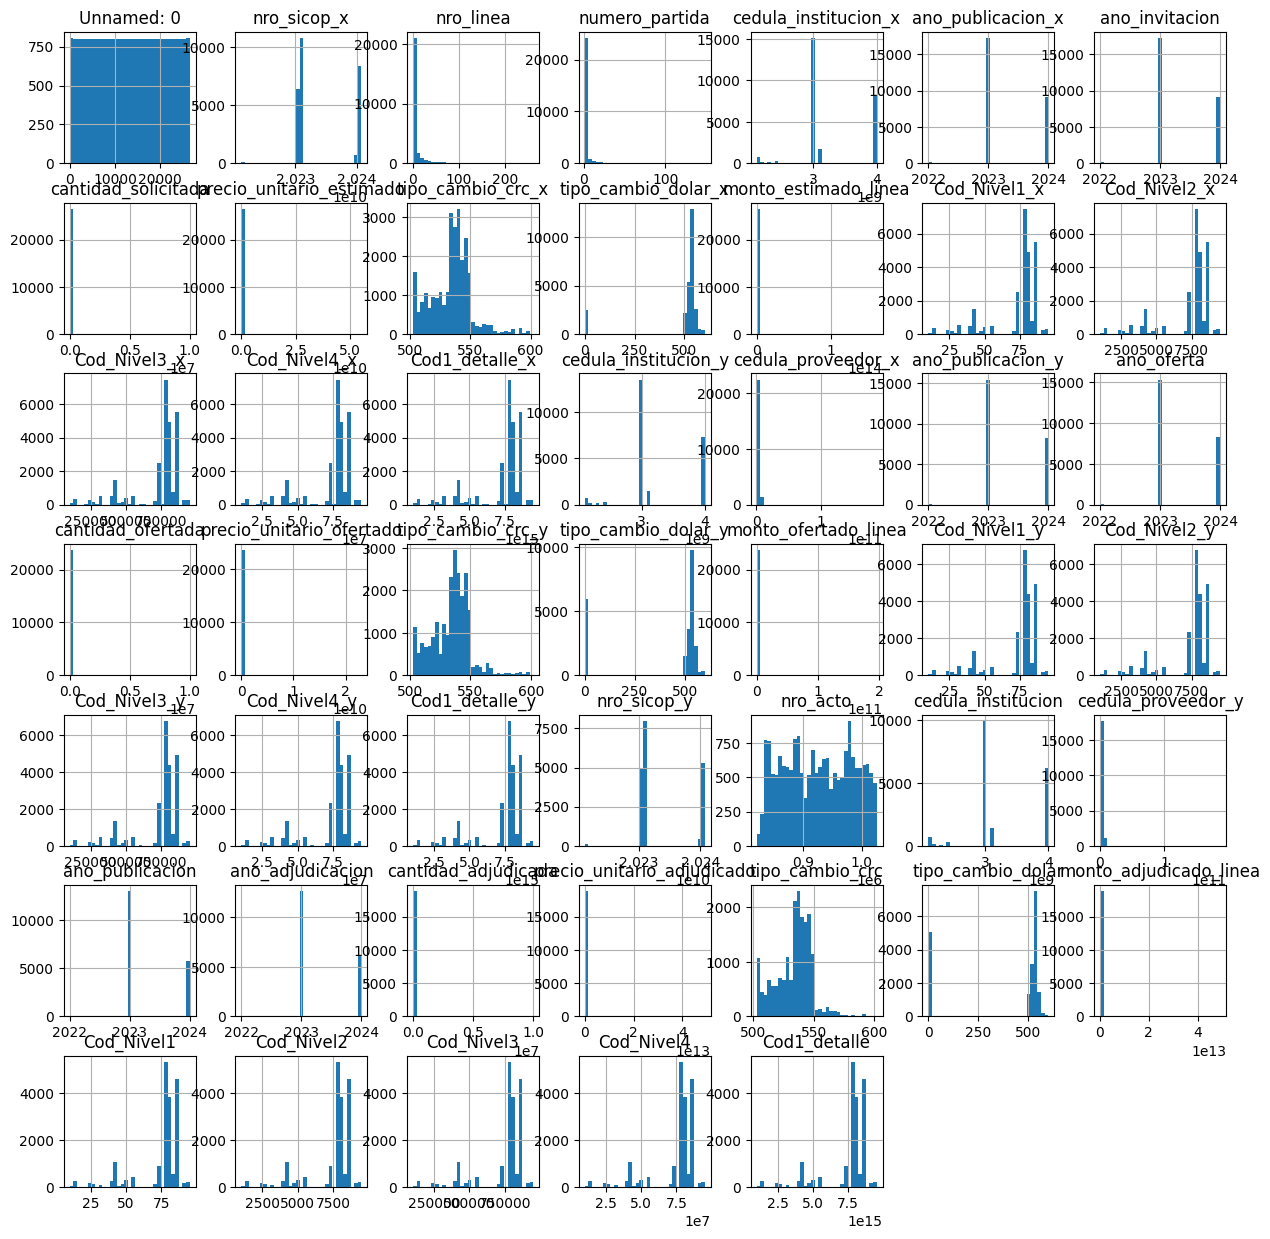

In [ ]:
#Histograma aplicado en cada una de las variables.
continuos.hist(bins=33, figsize=(15, 15))

<a id="section73"></a>
## <font color="#004D7F">7.3. Boxplot </font>

<Axes: >

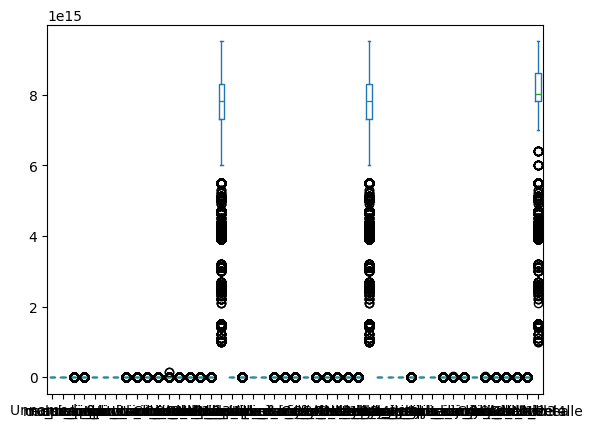

In [ ]:
%matplotlib inline
# Univariate Boxplot
continuos.plot(kind="box")

<a id="section74"></a>
## <font color="#004D7F">7.4. Valores únicos en cada variable del dataframe (categóricos) </font>

si quiero un análisis de cuales variables son categóricas

In [ ]:
categoricos=df.select_dtypes(include='object')

In [ ]:
categoricos.agg(['count', 'nunique']).transpose()

,count,nunique
Clave_iniciado_pk,26501,23424
subpartida_og,22535,90
nombre_institucion_x,26501,244
nro_procedimiento_x,26501,11139
fecha_publicacion_x,26501,11129
...,...,...
detalle1_producto,18802,3005
Cod2_detalle_y,18802,5885
detalle2_producto_y,18802,4432
Clave_adj_FK_proc,18802,18513


Cuales categorías por columna

In [ ]:
for col in categoricos.columns:
  print ("* %s= tiene los valores únicos siguientes: %s." %(col, df[col].unique()))

* Clave_iniciado_pk= tiene los valores únicos siguientes: ['2024021380924218200392331240' '2023100194648111219992302517'
 '2023080350218111190292374970' ... '2023111017218610189892040567'
 '2023100147137315999792013594' '2023070138294218190492333726'].
* subpartida_og= tiene los valores únicos siguientes: ['2.04.02' '5.01.07' '1.03.07' '2.99.03' nan '1.07.01' '1.08.08' '1.08.05'
 '1.01.01' '2.02.03' '1.07.02' '5.99.03' '1.08.01' '1.03.03' '1.03.02'
 '1.01.02' '2.99.02' '1.08.07' '1.04.04' '1.06.01' '1.05.01' '1.04.03'
 '1.08.04' '2.01.01' '1.03.01' '5.01.05' '1.04.99' '1.02.04' '1.04.05'
 '1.08.99' '1.99.99' '1.01.99' '1.04.06' '5.02.02' '1.08.06' '2.01.02'
 '5.02.99' '1.08.02' '1.03.05' '2.01.99' '2.03.01' '2.99.99' '5.01.01'
 '2.03.06' '1.01.03' '5.01.02' '1.04.02' '1.04.09' '1.08.03' '1.04.01'
 '1.99.05' '2.01.04' '2.02.02' '2.03.02' '1.03.04' '2.04.01' '1.07.03'
 '5.03.01' '5.01.04' '2.05.99' '1.03.06' '1.05.03' '5.02.01' '5.02.04'
 '5.01.06' '5.99.02' '1.02.03' '5.01.03' '2.99.01'

<a id="section8"></a>
# <font color="#004D7F"> 8. Valores nulos</font>

<a id="section81"></a>
## <font color="#004D7F"> 8.1 Valores nulos individuales</font>

Cuando se quiere analizar los valores nulos de una variable específica

In [ ]:
#cantidad de valores nulos de la columna del indice
# df["sepal_length"].isnull().sum().sum()

<a id="section81"></a>
## <font color="#004D7F"> 8.2 Valores individuales en toda la tabla</font>

A continuación se presentan varias opciones, según cual se adecue mejor a las necesidades.
La siguiente es una función para obtener la cantidad de faltantes por variable en una lista

In [ ]:
#Funcion para datos faltantes
import numpy as np
def cantidad_faltantes(df):
    for col in df.columns.tolist():
        print('{} - valores faltantes: {}'.format(col, df[col].isnull().sum()))
    print('\n')

In [ ]:
cantidad_faltantes(df)

Unnamed: 0 - valores faltantes: 0
Clave_iniciado_pk - valores faltantes: 0
nro_sicop_x - valores faltantes: 0
nro_linea - valores faltantes: 0
numero_partida - valores faltantes: 0
subpartida_og - valores faltantes: 3966
cedula_institucion_x - valores faltantes: 0
nombre_institucion_x - valores faltantes: 0
nro_procedimiento_x - valores faltantes: 0
fecha_publicacion_x - valores faltantes: 0
fecha_invitacion - valores faltantes: 0
ano_publicacion_x - valores faltantes: 0
ano_invitacion - valores faltantes: 0
tipo_procedimiento_x - valores faltantes: 0
modalidad_procedimiento_x - valores faltantes: 0
excepcion_cd_x - valores faltantes: 0
objeto_contractual_x - valores faltantes: 0
cantidad_solicitada - valores faltantes: 0
precio_unitario_estimado - valores faltantes: 0
tipo_moneda_x - valores faltantes: 0
tipo_cambio_crc_x - valores faltantes: 0
tipo_cambio_dolar_x - valores faltantes: 0
monto_estimado_linea - valores faltantes: 0
Cod_Nivel1_x - valores faltantes: 1
Nivel1_producto_x -

In [ ]:
null_df = pd.DataFrame({'null_counts':df.isna().sum().sort_values(ascending=False), 'null_pct':df.isna().sum()/df.shape[0] * 100}).T.astype(int).T
null_df

,null_counts,null_pct
Clave_adj_FK_ofe,7699,29
Clave_adj_FK_proc,7699,29
Clave_adjudicada_PK,7699,29
Clave_iniciado_pk,0,0
Clave_of_FK_proc,2812,10
...,...,...
tipo_procedimiento,7699,29
tipo_procedimiento_x,0,0
tipo_procedimiento_y,2812,10
tipo_proveedor_x,2812,10


Este comando puede servir para obtener información detallada, el número de columna, el nombre, la cantidad de no-nulos y el tipo de variable de cada columna

In [ ]:
#df.info(verbose=True, null_counts=True)

Datos faltantes en orden descendente

In [ ]:
df.isna().sum().sort_values(ascending=False)

tamano_proveedor_y     9454
nombre_proveedor_y     9454
tipo_proveedor_y       9454
Nivel2_producto        7700
Cod_Nivel3             7700
                       ... 
Clave_iniciado_pk         0
Comparacion               0
detalle1_producto_x       0
Cod1_detalle_x            0
Unnamed: 0                0
Length: 108, dtype: int64

Si quiero estimar cuantos faltan y eso cuanto representa

In [ ]:
#missing data
#hice el cambio para obtener el nombre de la  base
df_train=df
total = df_train.isnull().sum().sort_values(ascending=True)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.tail(73)

,Total,Percent
cantidad_ofertada,2812,0.106109
tipo_moneda_y,2812,0.106109
Cod_Nivel4_y,2812,0.106109
detalle1_producto_y,2812,0.106109
Cod1_detalle_y,2812,0.106109
...,...,...
tipo_cambio_crc,7700,0.290555
Nivel2_producto,7700,0.290555
tipo_proveedor_y,9454,0.356741
tamano_proveedor_y,9454,0.356741


Con este comando se puede visualizar los faltantes en la base, todos los amarillos son los faltantes, gráficamente

<Axes: >

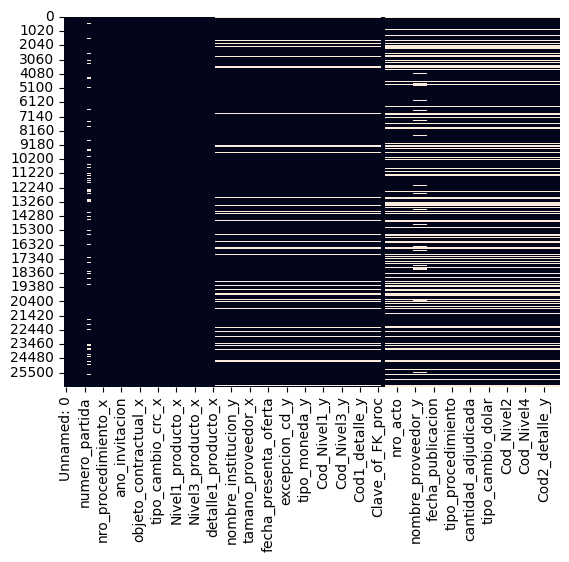

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

alternativa

<Axes: >

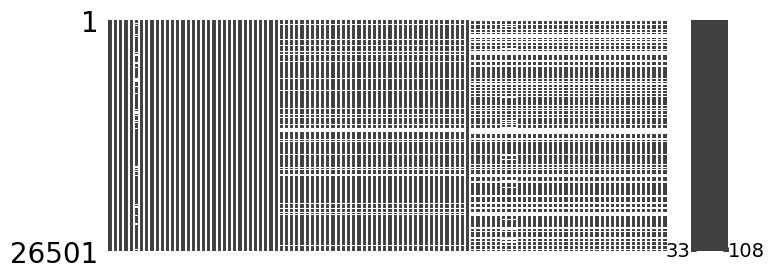

In [ ]:
import missingno as msno
msno.matrix(df, figsize=(8,3))

<a id="section81"></a>
## <font color="#004D7F"> 8.3 correlación entre valores faltantes</font>

En este caso los que no tienen datos es porque no tienen suficientes datos faltantes para hacer el análisis. Es importante por que a partir de este se puede notar razones de porqué son faltantes

<Axes: >

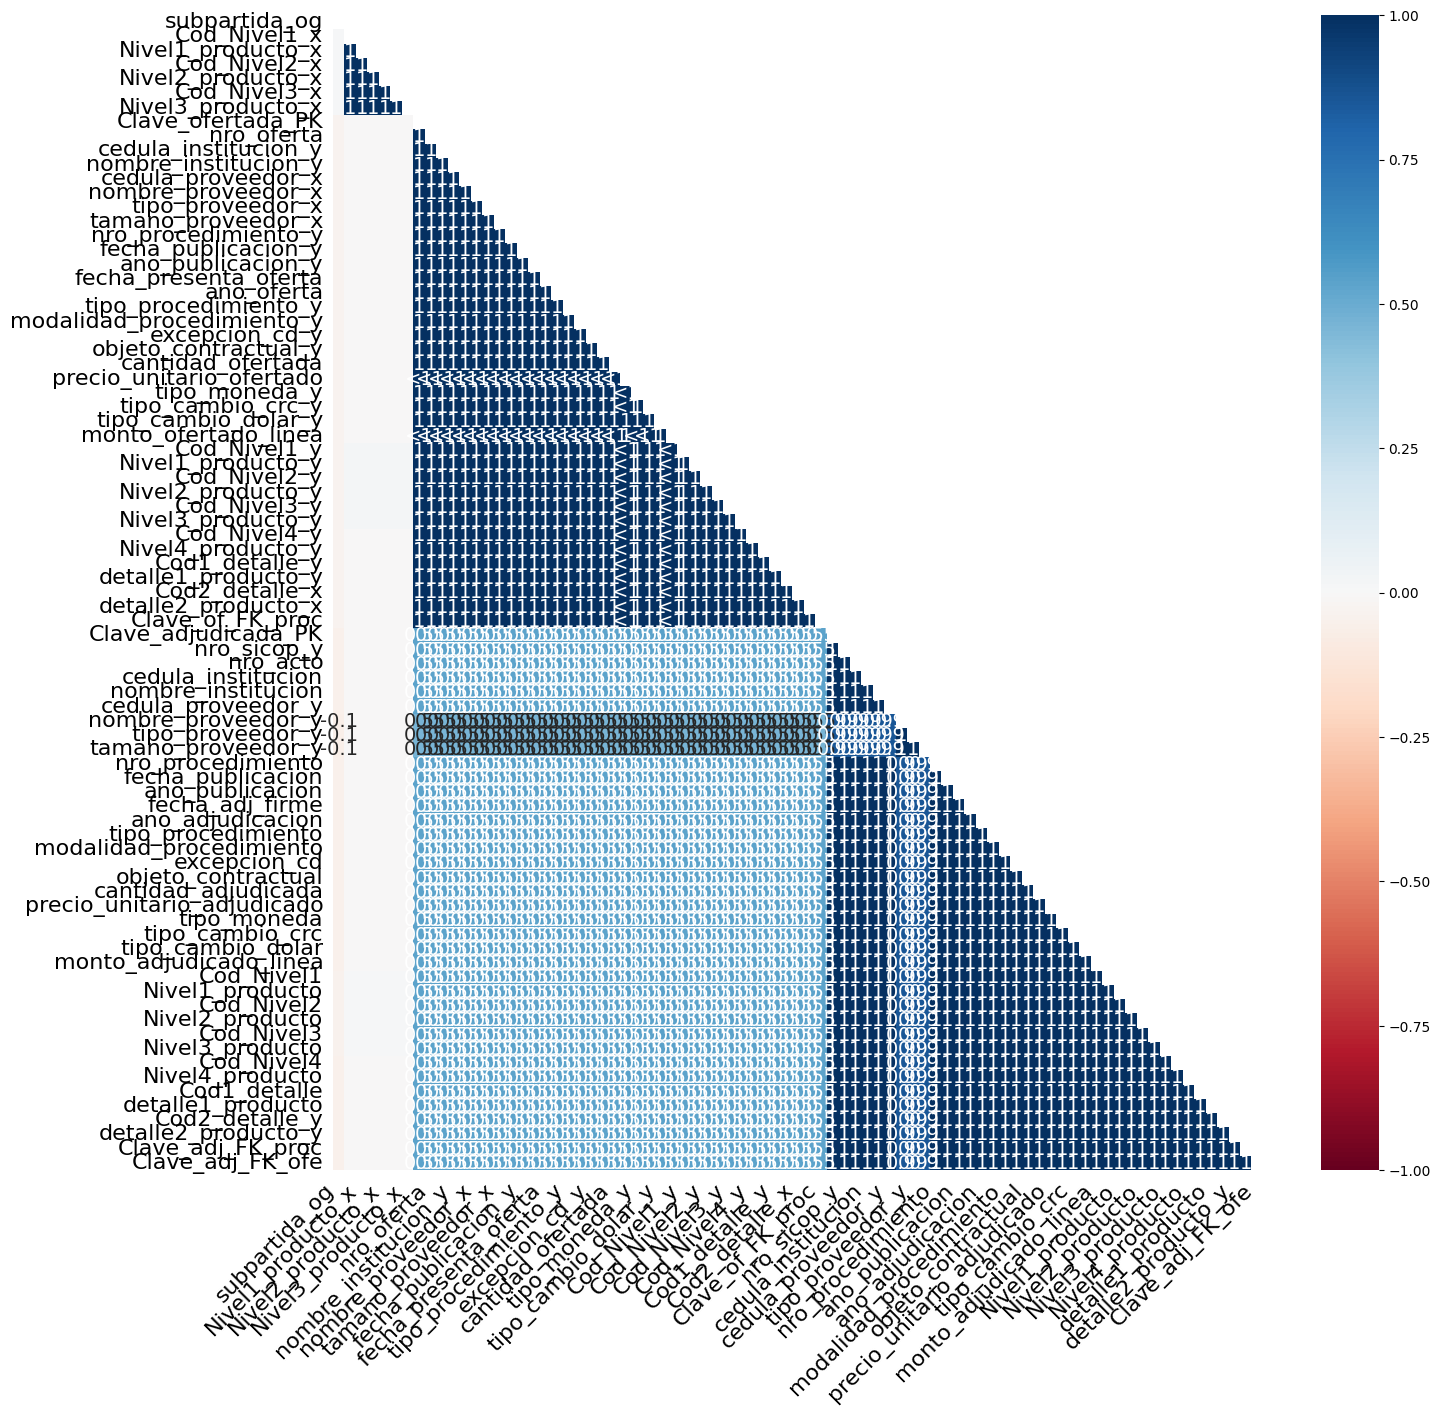

In [ ]:
msno.heatmap(df, figsize=(15,15))

<a id="section9"></a>
# <font color="#004D7F"> 9. Matriz de Dispersión por clase</font>

Los puntos en una matriz de diagrama de dispersión pueden ser coloreados por la etiqueta de clase en problemas de clasificación. Esto puede ayudarnos a detectar una separación clara (o no clara) de las clases y quizás a darnos una idea de lo difícil que puede ser el problema.

Al igual que el anterior gráfico los diagramas están dados por la interacción de los pares de atributos pero, en este caso, teniendo en cuenta la etiqueta clase.

In [ ]:
# %matplotlib inline
# sns.pairplot(df, hue="class")

In [ ]:
# %matplotlib inline

# #Correlation boxplot for clases

# plt.figure(1)
# plt.subplots(figsize=(10,10))
# plt.subplot(421)
# sns.boxplot(x="class", y="sepal_length", data=df)
# plt.title("sepal_length")
# plt.grid(True)

# plt.figure(2)
# plt.subplots(figsize=(10,10))
# plt.subplot(421)
# sns.boxplot(x="class", y="Sepal_width", data=df)
# plt.title("Sepal_width")
# plt.grid(True)


In [ ]:
# #Relación entre ...
# sns.catplot(x='sepal_length', y='Sepal_width', hue='class', kind = 'box', data = df)

<a id="section10"></a>
# <font color="#004D7F"> 10. Informe HTML de los datos</font>

Con el siguiente comando hacemos un reporte .html sobre cada una de las variables de la base, histograma y análisis individual

In [ ]:
# import sweetviz as sv
# #analyzing the dataset
# df_analysis=sv.analyze(df)
# #show analysis as html
# df_analysis.show_html('train_analysis.html')

In [ ]:
# # Crear el directorio si no existe
# import shutil
# destination_dir = 'dir2'
# os.makedirs(destination_dir, exist_ok=True)

# # Mover el archivo HTML a dir2
# source_path = 'train_analysis.html'
# destination_path = os.path.join(destination_dir, 'train_analysis.html')

# shutil.move(source_path, destination_path)

# print(f"Archivo guardado en: {destination_path}")

In [ ]:
df.columns

Index(['Unnamed: 0', 'Clave_iniciado_pk', 'nro_sicop_x', 'nro_linea',
       'numero_partida', 'subpartida_og', 'cedula_institucion_x',
       'nombre_institucion_x', 'nro_procedimiento_x', 'fecha_publicacion_x',
       ...
       'Cod_Nivel3', 'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto',
       'Cod1_detalle', 'detalle1_producto', 'Cod2_detalle_y',
       'detalle2_producto_y', 'Clave_adj_FK_proc', 'Clave_adj_FK_ofe'],
      dtype='object', length=108)

In [ ]:
os.getcwd()

'c:\\Users\\114310416\\Documents\\Data Challenge'

col_0,Count
Inconsistency,
Cantidad solicitada menor que adjudicada/ofertada,45
Diferencia significativa en montos,17447
Inconsistencia en códigos/descripciones de productos,2813
Inconsistencia en información de instituciones,2812
Inconsistencia en información de proveedores,9454
Invitación posterior a oferta,2846


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Definir tolerancia global
tolerance = 0.05

# Funciones de verificación
def verificar_temporal(df):
    inconsistencias = []
    for index, row in df.iterrows():
        if pd.to_datetime(row['fecha_publicacion_x']) > pd.to_datetime(row['fecha_invitacion']):
            inconsistencias.append((index, 'fecha_publicacion_x', 'fecha_invitacion', 'Publicación posterior a invitación'))
        if pd.to_datetime(row['fecha_invitacion']) > pd.to_datetime(row['fecha_presenta_oferta']):
            inconsistencias.append((index, 'fecha_invitacion', 'fecha_presenta_oferta', 'Invitación posterior a oferta'))
        if pd.to_datetime(row['fecha_presenta_oferta']) > pd.to_datetime(row['fecha_adj_firme']):
            inconsistencias.append((index, 'fecha_presenta_oferta', 'fecha_adj_firme', 'Oferta posterior a adjudicación firme'))
    return pd.DataFrame(inconsistencias, columns=['Row Index', 'Column 1', 'Column 2', 'Inconsistency'])

def verificar_montos_cantidades(df):
    inconsistencias = []
    for index, row in df.iterrows():
        if abs(row['monto_estimado_linea'] - row['monto_adjudicado_linea']) > tolerance or abs(row['monto_estimado_linea'] - row['monto_ofertado_linea']) > tolerance:
            inconsistencias.append((index, 'monto_estimado_linea', 'monto_adjudicado_linea/monto_ofertado_linea', 'Diferencia significativa en montos'))
        if row['cantidad_solicitada'] < row['cantidad_adjudicada'] or row['cantidad_solicitada'] < row['cantidad_ofertada']:
            inconsistencias.append((index, 'cantidad_solicitada', 'cantidad_adjudicada/cantidad_ofertada', 'Cantidad solicitada menor que adjudicada/ofertada'))
    return pd.DataFrame(inconsistencias, columns=['Row Index', 'Column 1', 'Column 2', 'Inconsistency'])

def verificar_descripciones_codigos(df):
    inconsistencias = []
    for index, row in df.iterrows():
        if row['Cod_Nivel1_x'] != row['Cod_Nivel1_y'] or row['Nivel1_producto_x'] != row['Nivel1_producto_y']:
            inconsistencias.append((index, 'Cod_Nivel1/Nivel1_producto', 'Cod_Nivel1/Nivel1_producto', 'Inconsistencia en códigos/descripciones de productos'))
    return pd.DataFrame(inconsistencias, columns=['Row Index', 'Column 1', 'Column 2', 'Inconsistency'])

def verificar_instituciones_proveedores(df):
    inconsistencias = []
    for index, row in df.iterrows():
        if row['cedula_institucion_x'] != row['cedula_institucion_y'] or row['nombre_institucion_x'] != row['nombre_institucion_y']:
            inconsistencias.append((index, 'cedula_institucion/nombre_institucion', 'cedula_institucion/nombre_institucion', 'Inconsistencia en información de instituciones'))
        if row['cedula_proveedor_x'] != row['cedula_proveedor_y'] or row['nombre_proveedor_x'] != row['nombre_proveedor_y']:
            inconsistencias.append((index, 'cedula_proveedor/nombre_proveedor', 'cedula_proveedor/nombre_proveedor', 'Inconsistencia en información de proveedores'))
    return pd.DataFrame(inconsistencias, columns=['Row Index', 'Column 1', 'Column 2', 'Inconsistency'])

# Realizar análisis de inconsistencias
inconsistencias_temporales = verificar_temporal(df)
inconsistencias_montos_cantidades = verificar_montos_cantidades(df)
inconsistencias_descripciones_codigos = verificar_descripciones_codigos(df)
inconsistencias_instituciones_proveedores = verificar_instituciones_proveedores(df)

# Combinar todos los resultados en un solo DataFrame
inconsistencias_totales = pd.concat([inconsistencias_temporales, inconsistencias_montos_cantidades, inconsistencias_descripciones_codigos, inconsistencias_instituciones_proveedores],
                                    ignore_index=True)

# Aplicar Isolation Forest para detectar anomalías
df_clean = df.dropna()

# Seleccionar columnas relevantes
selected_columns = [
    'fecha_publicacion_x', 'fecha_invitacion', 'fecha_presenta_oferta', 'fecha_adj_firme',
    'monto_estimado_linea', 'monto_adjudicado_linea', 'monto_ofertado_linea',
    'cantidad_solicitada', 'cantidad_adjudicada', 'cantidad_ofertada'
]

# Convertir fechas a enteros para el análisis
for col in ['fecha_publicacion_x', 'fecha_invitacion', 'fecha_presenta_oferta', 'fecha_adj_firme']:
    df_clean[col] = pd.to_datetime(df_clean[col]).astype('int64') // 10**9

df_selected = df_clean[selected_columns]

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Reducir la dimensionalidad usando PCA
pca = PCA(n_components=10)  # Ajusta el número de componentes según sea necesario
df_reduced = pca.fit_transform(df_scaled)

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(df_reduced)

# Predecir anomalías
df_clean['anomaly'] = iso_forest.predict(df_reduced)
df_clean['anomaly'] = df_clean['anomaly'].map({1: 0, -1: 1})

# Filtrar las anomalías
anomalies = df_clean[df_clean['anomaly'] == 1]

# Combinar las anomalías con los datos originales
anomalies_with_data = df.loc[anomalies.index]

# Añadir la columna de anomalía al DataFrame original de anomalías
anomalies_with_data['anomaly'] = 1

# Mostrar las inconsistencias encontradas
print(inconsistencias_totales)
print(anomalies_with_data)

# Guardar las inconsistencias y anomalías en archivos Excel para su análisis
inconsistencias_totales.to_excel('inconsistencias_licitacion_publica.xlsx', index=False)
anomalies_with_data.to_excel('anomalies_isolation_forest.xlsx', index=False)


       Row Index                               Column 1  \
0              6                       fecha_invitacion   
1             20                       fecha_invitacion   
2             28                       fecha_invitacion   
3             31                       fecha_invitacion   
4             44                       fecha_invitacion   
...          ...                                    ...   
35412      26496      cedula_proveedor/nombre_proveedor   
35413      26497      cedula_proveedor/nombre_proveedor   
35414      26499      cedula_proveedor/nombre_proveedor   
35415      26500  cedula_institucion/nombre_institucion   
35416      26500      cedula_proveedor/nombre_proveedor   

                                    Column 2  \
0                      fecha_presenta_oferta   
1                      fecha_presenta_oferta   
2                      fecha_presenta_oferta   
3                      fecha_presenta_oferta   
4                      fecha_presenta_oferta   
...

In [ ]:
# Resumen de las inconsistencias detectadas
print("Resumen de las inconsistencias detectadas:")
print(inconsistencias_totales['Inconsistency'].value_counts())

# Resumen de las anomalías detectadas
print("\nResumen de las anomalías detectadas:")
print(anomalies_with_data.describe())

# Conteo de anomalías por columna
print("\nConteo de anomalías por columna:")
for col in anomalies_with_data.columns:
    if col != 'anomaly':
        print(f"{col}: {anomalies_with_data[col].isnull().sum()} anomalías")


Resumen de las inconsistencias detectadas:
Inconsistency
Diferencia significativa en montos                      17447
Inconsistencia en información de proveedores             9454
Invitación posterior a oferta                            2846
Inconsistencia en códigos/descripciones de productos     2813
Inconsistencia en información de instituciones           2812
Cantidad solicitada menor que adjudicada/ofertada          45
Name: count, dtype: int64

Resumen de las anomalías detectadas:
         Unnamed: 0   nro_sicop_x   nro_linea  numero_partida  \
count    713.000000  7.130000e+02  713.000000      713.000000   
mean   13311.925666  2.023318e+10    8.450210        2.579243   
std     7555.313928  5.696927e+06   13.316822        6.409019   
min       14.000000  2.022120e+10    1.000000        1.000000   
25%     6542.000000  2.023020e+10    1.000000        1.000000   
50%    13766.000000  2.023080e+10    2.000000        1.000000   
75%    19809.000000  2.024011e+10    9.000000       

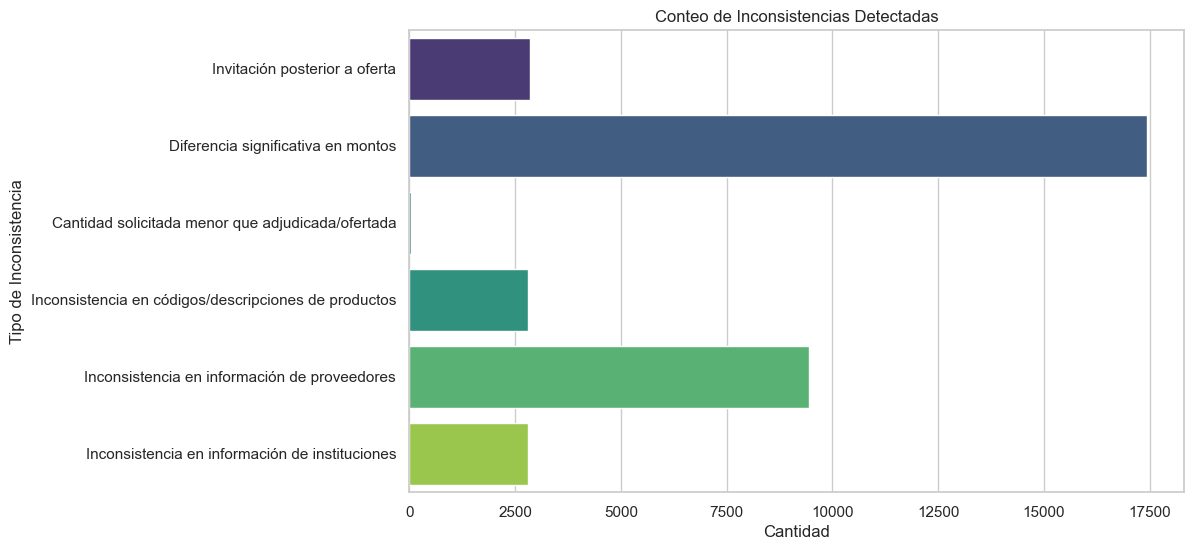

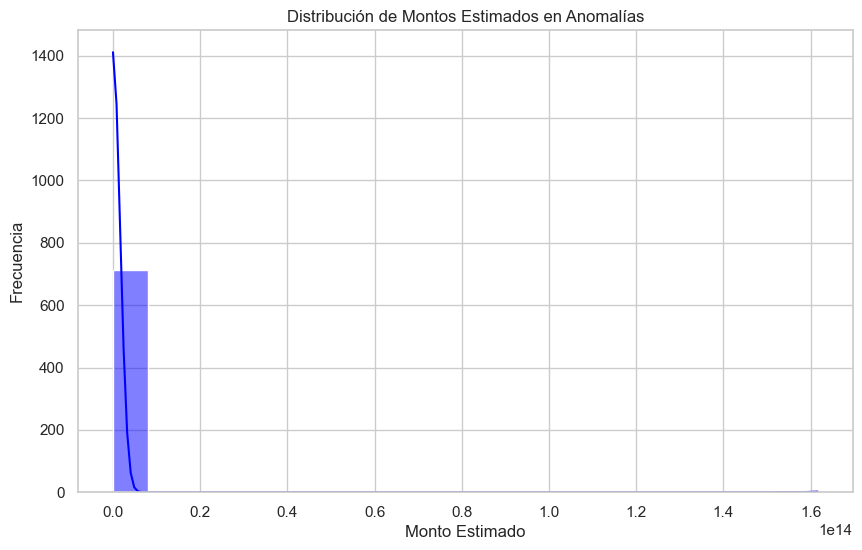

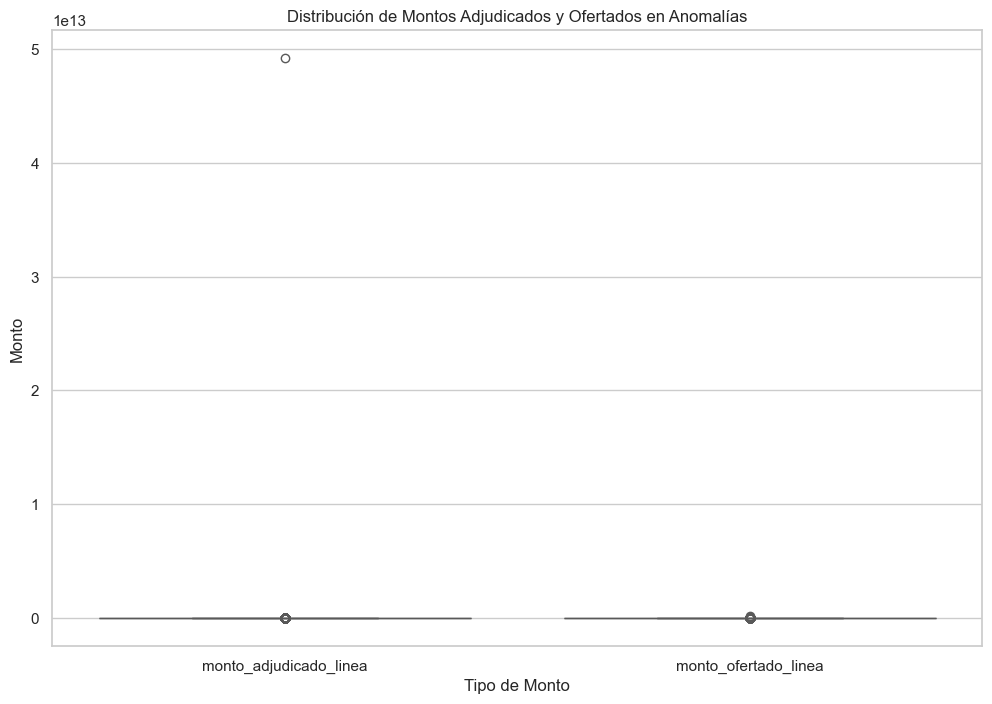

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos
sns.set(style="whitegrid")

# Gráfico de barras de inconsistencias
plt.figure(figsize=(10, 6))
sns.countplot(y="Inconsistency", data=inconsistencias_totales, palette="viridis")
plt.title("Conteo de Inconsistencias Detectadas")
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Inconsistencia")
plt.show()

# Histograma de anomalías por monto estimado
plt.figure(figsize=(10, 6))
sns.histplot(anomalies_with_data['monto_estimado_linea'], bins=20, kde=True, color='blue')
plt.title("Distribución de Montos Estimados en Anomalías")
plt.xlabel("Monto Estimado")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de montos adjudicados y ofertados en anomalías
plt.figure(figsize=(12, 8))
sns.boxplot(data=anomalies_with_data[['monto_adjudicado_linea', 'monto_ofertado_linea']], palette="Set2")
plt.title("Distribución de Montos Adjudicados y Ofertados en Anomalías")
plt.xlabel("Tipo de Monto")
plt.ylabel("Monto")
plt.show()



Conteo de anomalías por categoría de productos:
Nivel1_producto_x
Servicios basados en ingeniería, investigación y tecnología                                           135
Servicios de construcción, mantenimiento y reparación de instalaciones o edificaciones                 76
Servicios de Transporte, Almacenaje y Correo                                                           74
Servicios Editoriales, de Diseño, Gráficos y de Bellas Artes                                           62
Servicios Educativos y de Formación                                                                    60
Suministros, componentes y accesorios eléctricos y de iluminación                                      41
Servicios financieros, de auditoria y de seguros                                                       39
Maquinaria y Accesorios para Generación y Distribución de Energía                                      34
Servicios de manufactura y producción industrial                                     

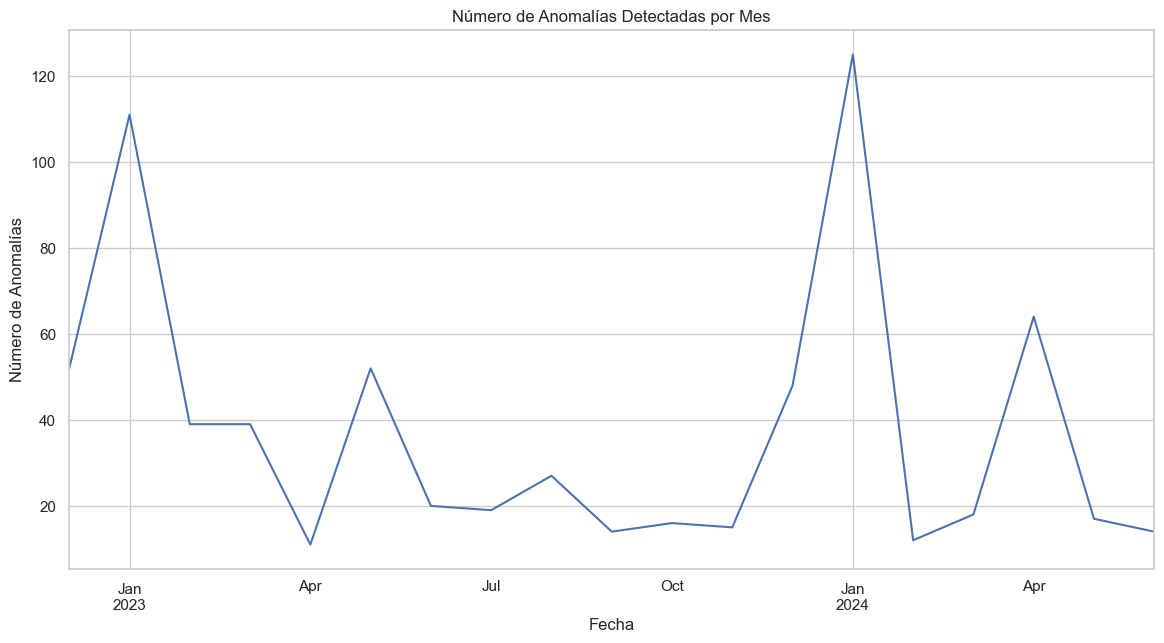

In [ ]:
# Agrupar y contar anomalías por categorías de productos
print("\nConteo de anomalías por categoría de productos:")
print(anomalies_with_data['Nivel1_producto_x'].value_counts())

# Análisis temporal de anomalías
anomalies_with_data['fecha_invitacion'] = pd.to_datetime(anomalies_with_data['fecha_invitacion'])
anomalies_with_data.set_index('fecha_invitacion', inplace=True)

plt.figure(figsize=(14, 7))
anomalies_with_data['anomaly'].resample('M').sum().plot()
plt.title("Número de Anomalías Detectadas por Mes")
plt.xlabel("Fecha")
plt.ylabel("Número de Anomalías")
plt.show()
